## **6.4: Supervised Machine Learning: Regression**

### **Contents**
1. Importing Libraries for Visualization and Geospatial Analysis
2. Importing Analysis Data
3. Data Cleaning
4. Data Preparation for Regression Analysis
5. Summary

### **1. Importing Libraries**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

### **2. Importing Analysis Data**

In [2]:
# Create data path
path = r'/Users/anjanpakhrin/Documents/US Accidents Analysis 2016-2023'

In [3]:
# Importing cleaned DataFrame from previous step
df_accidents = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_accidents_6-3.pkl'))

In [4]:
# Checking output
df_accidents.head(2)

,id,source,severity,start_time,end_time,distance(mi),state,temperature(f),wind_chill(f),humidity(%),...,astronomical_twilight,month,month_name,day_of_week,accident_day,accident_hour,time_of_day,severity_label,extreme_flag,year
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Ohio,36.900002,0.0,91.0,...,Night,2,February,0,Monday,5,Night,Serious,False,2016
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Ohio,37.900002,0.0,100.0,...,Day,2,February,0,Monday,6,Morning,Moderate,False,2016


### **3. Data Cleaning**

In [5]:
# Checking data shape
df_accidents.shape

(7477440, 29)

**3.1: Check for Missing Values**

In [6]:
# Check for missing values
df_accidents.isnull().sum()

id                       0
source                   0
severity                 0
start_time               0
end_time                 0
distance(mi)             0
state                    0
temperature(f)           0
wind_chill(f)            0
humidity(%)              0
pressure(in)             0
visibility(mi)           0
wind_direction           0
wind_speed(mph)          0
precipitation(in)        0
weather_condition        0
sunrise_sunset           0
civil_twilight           0
nautical_twilight        0
astronomical_twilight    0
month                    0
month_name               0
day_of_week              0
accident_day             0
accident_hour            0
time_of_day              0
severity_label           0
extreme_flag             0
year                     0
dtype: int64

**3.2: Duplicates Check**

In [7]:
# Check Duplicates
dups = df_accidents.duplicated()

In [8]:
# No dups
dups.shape

(7477440,)

> **No Duplicates found**

**3.3: Check for Extreme Values**

**Extreme Value Checke** have been already conducted in the previous exercises. However, **Extremes** can be checked in diiferent ways, such:
- Interquartile Range (IQR) Method
- Using Z-scores (Standard Deviation Method)
- Visualization (boxplots & histograms) Method

A few random checks for **extreme values** with **"VISUALIZATION"** will be conducted for a few selected variables, which are critical to investigate the raod accident frequency in this case.

**- Extremes Value Checks for "temperature (f)"**

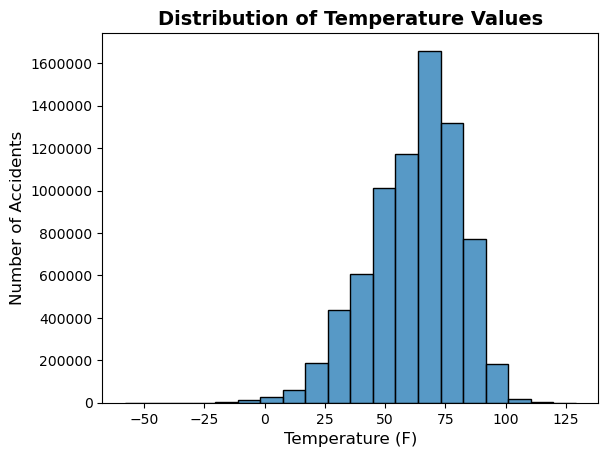

In [9]:
# Visualizing extreme values for 'temperature(f)'
sns.histplot(df_accidents['temperature(f)'], bins=20, kde = False)
plt.title('Distribution of Temperature Values', fontsize = 14, fontweight = 'bold')
plt.xlabel('Temperature (F)', fontsize = 12)
plt.ylabel('Number of Accidents', fontsize = 12)

# Plotting y-axis value in normal number format
plt.ticklabel_format(style='plain', axis='y')

# Show histogram
plt.show()

In [10]:
# Check the mean, median, max of "Temperature"

print("* Mean of Temperature (F):", round(df_accidents['temperature(f)'].mean(), 2))
print("* Median of Temperature (F):", round(df_accidents['temperature(f)'].median(), 2))
print("* Max of Temperature (F):", round(df_accidents['temperature(f)'].max(), 2))

* Mean of Temperature (F): 62.16
* Median of Temperature (F): 64.0
* Max of Temperature (F): 129.2


**- Extremes Value Checks for "wind_chill (f)"**

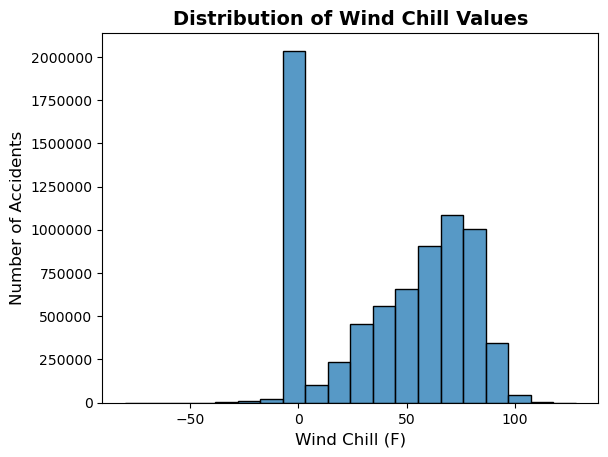

In [11]:
sns.histplot(df_accidents['wind_chill(f)'], bins=20, kde = False)
plt.title('Distribution of Wind Chill Values', fontsize = 14, fontweight = 'bold')
plt.xlabel('Wind Chill (F)', fontsize = 12)
plt.ylabel('Number of Accidents', fontsize = 12)

# Plotting y-axis value in normal number format
plt.ticklabel_format(style='plain', axis='y')

# Show histogram
plt.show()

In [12]:
# Check the mean, median, max of "Wind Chill"

print("* Mean of Wind Chill (F):", round(df_accidents['wind_chill(f)'].mean(), 2))
print("* Median of Wind Chill (F):", round(df_accidents['wind_chill(f)'].median(), 2))
print("* Max of Wind Chill (F):", round(df_accidents['wind_chill(f)'].max(), 2))

* Mean of Wind Chill (F): 43.18
* Median of Wind Chill (F): 51.0
* Max of Wind Chill (F): 128.0


**- Extremes Value Checks for "humidity (%)"**

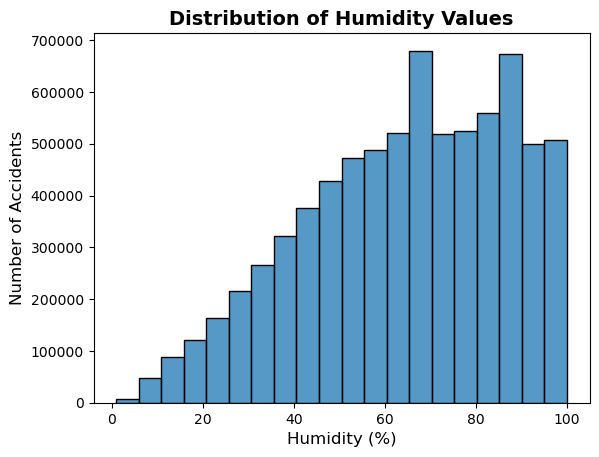

In [13]:
sns.histplot(df_accidents['humidity(%)'], bins=20, kde = False)
plt.title('Distribution of Humidity Values', fontsize = 14, fontweight = 'bold')
plt.xlabel('Humidity (%)', fontsize = 12)
plt.ylabel('Number of Accidents', fontsize = 12)

# Plotting y-axis value in normal number format
plt.ticklabel_format(style='plain', axis='y')

# Show histogram
plt.show()

> **No Outliers** found for humidity, since the values lie between 0 and 100%.

In [14]:
# Check the mean, median, max of "Humidity"

print("* Mean of Humidity (%):", round(df_accidents['humidity(%)'].mean(), 2))
print("* Median of Humidity (%):", round(df_accidents['humidity(%)'].median(), 2))
print("* Max of Humidity (%):", round(df_accidents['humidity(%)'].max(), 2))

* Mean of Humidity (%): 64.78
* Median of Humidity (%): 67.0
* Max of Humidity (%): 100.0


**- Extremes Value Checks for "visibility (mi)"**

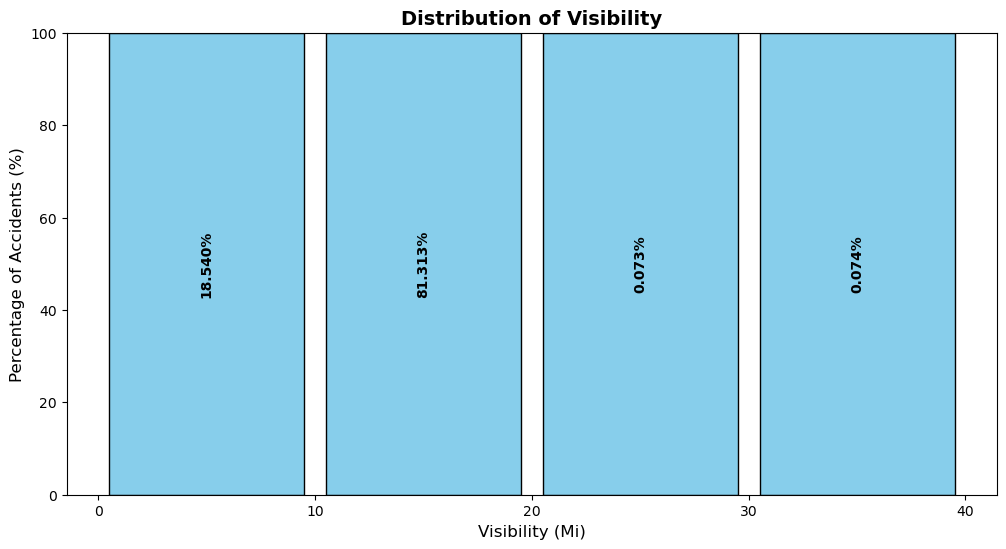

In [15]:
# Histogram for visibility
from matplotlib.ticker import MultipleLocator

# Define bin edges (bin width 20)
min_vis = df_accidents['visibility(mi)'].min()
max_vis = df_accidents['visibility(mi)'].max()
bins = np.arange(min_vis, max_vis + 10, 10)

# Compute histogram
counts, bin_edges = np.histogram(df_accidents['visibility(mi)'], bins=bins)
percentages = counts / counts.sum() * 100

# Normalize counts to full height (100%)
normalized_heights = np.ones_like(counts) * 100  # full height bars

# Plot histogram with all bars full height
plt.figure(figsize=(12,6))
bars = plt.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,  # bin centers
    normalized_heights,
    width=(bin_edges[1] - bin_edges[0]) * 0.9,
    color="skyblue",
    edgecolor="black"
)

# Add percentage text inside each bar (rotated 90°)
for bar, pct in zip(bars, percentages):
    if pct > 0:
        plt.text(
            bar.get_x() + bar.get_width()/2,
            50,                # middle of full-height bar
            f"{pct:.3f}%",
            ha="center",
            va="center",
            rotation=90,
            fontsize=10,
            fontweight="bold",
            color="black"
        )

# Titles & labels
plt.title("Distribution of Visibility", fontsize=14, fontweight="bold")
plt.xlabel("Visibility (Mi)", fontsize=12)
plt.ylabel("Percentage of Accidents (%)", fontsize=12)

# X-axis ticks every 10
plt.gca().xaxis.set_major_locator(MultipleLocator(10))

# Y-axis 0-100%
plt.ylim(0, 100)

plt.show()

In [16]:
# Check the mean, median, max of "Visibility (mi)"

print("* Mean of Visibility (Mi):", round(df_accidents['visibility(mi)'].mean(), 2))
print("* Median of Visibility (Mi):", round(df_accidents['visibility(mi)'].median(), 2))
print("* Max of Visibility (Mi):", round(df_accidents['visibility(mi)'].max(), 2))

* Mean of Visibility (Mi): 9.11
* Median of Visibility (Mi): 10.0
* Max of Visibility (Mi): 40.0


**- Extremes Value Checks for "wind speed (mph)"**

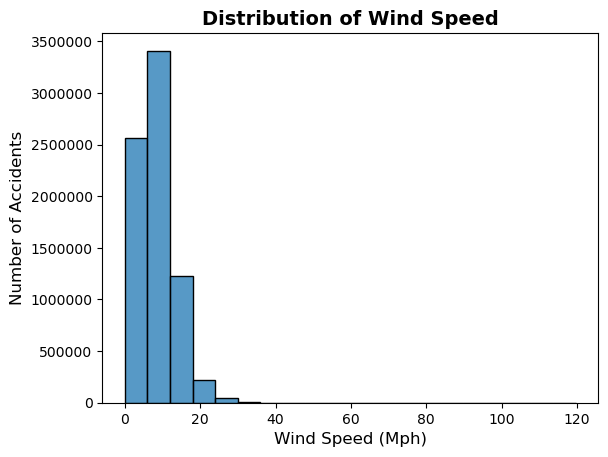

In [17]:
# Histogram for wind speed
sns.histplot(df_accidents['wind_speed(mph)'], bins=20, kde = False)
plt.title('Distribution of Wind Speed', fontsize = 14, fontweight = 'bold')
plt.xlabel('Wind Speed (Mph)', fontsize = 12)
plt.ylabel('Number of Accidents', fontsize = 12)

# Plotting y-axis value in normal number format
plt.ticklabel_format(style='plain', axis='y')

# Show histogram
plt.show()

In [18]:
# Check the mean, median, max of "Wind Speed (mph)"

print("* Mean of Wind Speed (Mph):", round(df_accidents['wind_speed(mph)'].mean(), 2))
print("* Median of Wind Speed (Mph):", round(df_accidents['wind_speed(mph)'].median(), 2))
print("* Max of Wind Speed (Mph):", round(df_accidents['wind_speed(mph)'].max(), 2))

* Mean of Wind Speed (Mph): 7.62
* Median of Wind Speed (Mph): 7.0
* Max of Wind Speed (Mph): 119.7


**- Extremes Value Checks for "precipitation (in)"**

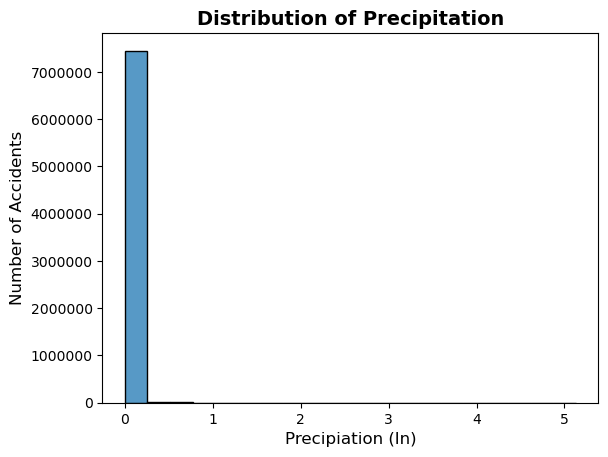

In [19]:
# Histogram for precipitation(in)
sns.histplot(df_accidents['precipitation(in)'], bins=20, kde = False)
plt.title('Distribution of Precipitation', fontsize = 14, fontweight = 'bold')
plt.xlabel('Precipiation (In)', fontsize = 12)
plt.ylabel('Number of Accidents', fontsize = 12)

# Plotting y-axis value in normal number format
plt.ticklabel_format(style='plain', axis='y')

# Show histogram
plt.show()

In [20]:
# Check the mean, median, max of "Precipitation (in)"

print("* Mean of Precipitation (in):", round(df_accidents['precipitation(in)'].mean(), 2))
print("* Median of Precipitation (in):", round(df_accidents['precipitation(in)'].median(), 2))
print("* Max of Precipitation (in):", round(df_accidents['precipitation(in)'].max(), 2))

* Mean of Precipitation (in): 0.01
* Median of Precipitation (in): 0.0
* Max of Precipitation (in): 5.13


> **Outcomes of above conducted tests are based on the cleaned data in previous steps under following conditions:**
> - Temperatur (°F): −60 - 130 (Covers extreme Alaska lows to Death Valley high)
> - Wind Chill (°F): -80 - 130
> - Visibility (mi): 0 - 40 (0: No visibility (dense fog, blizzard), 10: Clear, > 40: Not meaningful (sky is clear)).
> - Wind Speed (mph): 0 - 120 (0: Calm, 60 - 100: Strong (Huricanes, Tornados, >120: Unlikely Outliers)
> - Precipitation (in): 0 - 6 (2 - 3: Heavy rainfall, 6: Unrealistic) --> inches/hour)

### 4. Data Preparation for Regression Analysis

> **Objective:** To be able to conduct the hypothesis check that population data by state per year is required. Since the **accidents dataframe** does not contain the population data, population data by state per year has been taken from [US Census Bureau](https://www.census.gov/topics/population.html).

> Before merging, both datasets needed preparation to align at the same state–year level. The **population data** need to be reshaped from wide to long format so that year became its own column, consistent with the accident data. Accident records required aggregation by state and year to convert millions of individual rows into yearly counts, making them comparable with population totals. Consistency checks on keys (state names and year formats) ensures the merge would work correctly. These steps are necessary to create a clean, compatible dataset for analyzing the relationship between population size and accident counts with regression.

In [21]:
# Importing cleaned DataFrame from previous step
df_pop = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'us_pop_2016-2022.csv'), index_col = False)

In [22]:
df_pop.head()

,state,2016,2017,2018,2019,2020,2021,2022
0,Alabama,4863525,4874486,4887681,4903185,5025369,5033094,5049196
1,Alaska,741456,739700,735139,731545,733395,733017,734420
2,Arizona,6941072,7044008,7158024,7278717,7158110,7187135,7274078
3,Arkansas,2989918,3001345,3009733,3017804,3011553,3014546,3026870
4,California,39167117,39358497,39461588,39512223,39555674,39521958,39142565


In [23]:
df_pop.shape

(51, 8)

In [24]:
df_pop.isnull().sum()

state    0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
dtype: int64

In [25]:
# Reshape the population dataframe into long format
df_pop_long = df_pop.melt(
    id_vars='state',
    value_vars=['2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    var_name='year',
    value_name='population'
)

# Convert year column to integer
df_pop_long['year'] = df_pop_long['year'].astype(int)

# Check
df_pop_long.head()

,state,year,population
0,Alabama,2016,4863525
1,Alaska,2016,741456
2,Arizona,2016,6941072
3,Arkansas,2016,2989918
4,California,2016,39167117


In [26]:
df_pop_long.isnull().sum()

state         0
year          0
population    0
dtype: int64

In [27]:
# Export dataframe as pickle
df_pop.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_pop_clean.pkl'))

In [28]:
# Prepare us accidents dataframe for mergning
# Make sure year is integer
df_accidents['year'] = df_accidents['year'].astype(int)

# Check unique states in both datasets
print(set(df_accidents['state'].unique()) - set(df_pop_long['state'].unique()))

set()


In [29]:
# Aggregate accident counts by state and year
# Count accidents per state per year
accident_counts = df_accidents.groupby(['state','year'], observed=True).size().reset_index(name='accident_count')

print("Accident counts by state and year:")
accident_counts.head()

Accident counts by state and year:


,state,year,accident_count
0,Alabama,2016,135
1,Alabama,2017,2904
2,Alabama,2018,14099
3,Alabama,2019,19238
4,Alabama,2020,20182


In [30]:
# Unique states in both dataframes
states_population = set(df_pop_long['state'].unique())
states_accidents = set(accident_counts['state'].unique())

# States present in population data but missing in accident data
missing_in_accidents = states_population - states_accidents
print("States in population data but not in accidents:", missing_in_accidents)

# States present in accident data but missing in population data
missing_in_population = states_accidents - states_population
print("States in accidents but not in population data:", missing_in_population)

# Quick counts for comparison
print("Population dataset states:", len(states_population))
print("Accident dataset states:", len(states_accidents))

States in population data but not in accidents: {'Alaska', 'Hawaii'}
States in accidents but not in population data: set()
Population dataset states: 51
Accident dataset states: 49


> **Observation:** Population dataset has 51 regions while accident dataset has only 49 regions (Alaska and Hawaii missing). Therefore, Alaska and Hawaii will also be excluded from the the population dataset before merging both dataframe for to keep consitency.

In [31]:
# Drop Alaska and Hawaii from population data
df_pop_long = df_pop_long[~df_pop_long['state'].isin(['Alaska', 'Hawaii'])]

# Verify the dropping
print("Population dataset states:", df_pop_long['state'].nunique())
print("Accident dataset states:", accident_counts['state'].nunique())

Population dataset states: 49
Accident dataset states: 49


In [32]:
# Checking shapes of both dataframes
print("Shape of aggregated accidents dataframe:", df_accidents.shape)
print("Shape of reshaped population dataframe:", df_pop_long.shape)

Shape of aggregated accidents dataframe: (7477440, 29)
Shape of reshaped population dataframe: (343, 3)


In [33]:
# Merge datasets
df_merged = accident_counts.merge(
    df_pop_long,
    on=['state','year'],
    how='left'  # left join to ensure all accident counts are preserved
)

In [34]:
# Quick check
df_merged.head()

,state,year,accident_count,population
0,Alabama,2016,135,4863525
1,Alabama,2017,2904,4874486
2,Alabama,2018,14099,4887681
3,Alabama,2019,19238,4903185
4,Alabama,2020,20182,5025369


In [35]:
# Check for missing population values in merged dataframe
df_merged[df_merged['population'].isna()]

,state,year,accident_count,population


In [36]:
# Calculate basic statistics
df_merged.describe()

,year,accident_count,population
count,343.000000,343.000000,3.430000e+02
mean,2019.000000,21800.116618,6.655558e+06
std,2.002922,43606.403271,7.350057e+06
min,2016.000000,3.000000,5.768440e+05
25%,2017.000000,1860.500000,1.920780e+06
50%,2019.000000,7944.000000,4.657874e+06
75%,2021.000000,23591.500000,7.717398e+06
max,2022.000000,375841.000000,3.955567e+07


#### 4.1:

In [37]:
df_merged.shape

(343, 4)

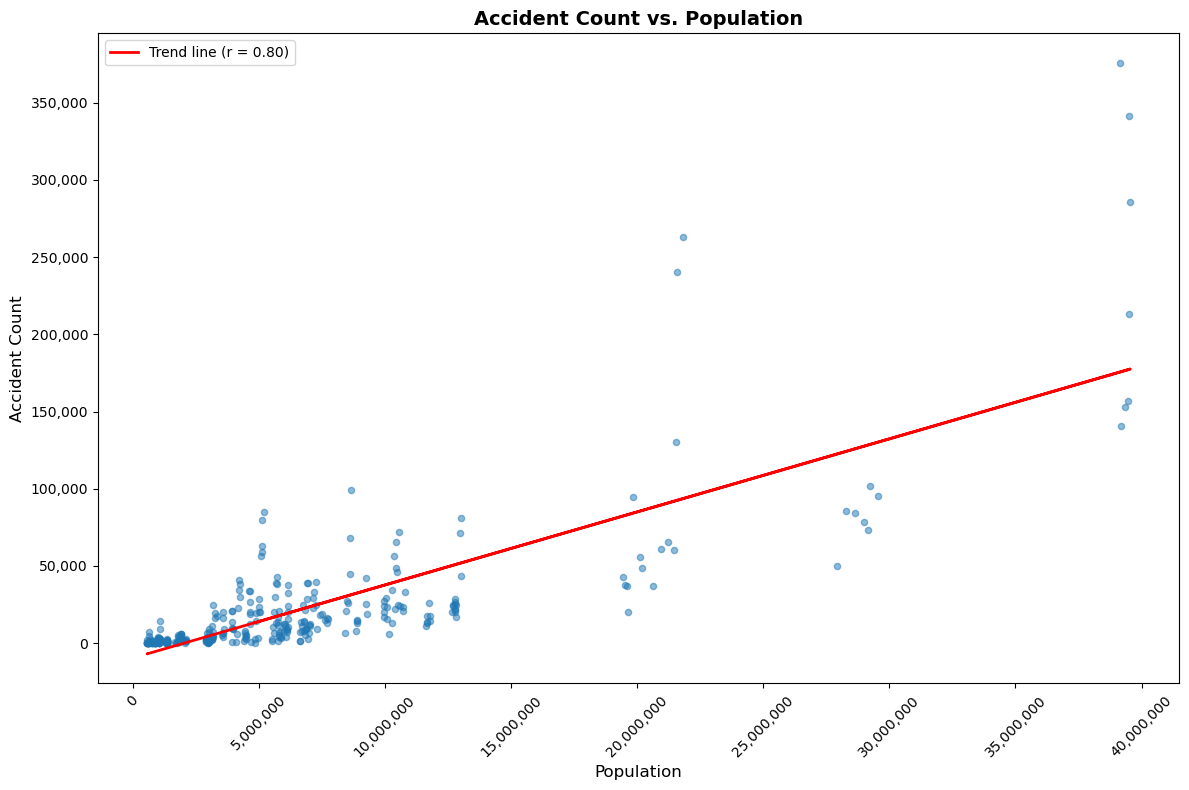

Correlation coefficient (r): 0.798


In [38]:
# Create scatterplot
plt.figure(figsize=(12, 8))
plt.scatter(df_merged['population'], df_merged['accident_count'], alpha=0.5, s=20)

# Calculate trend line (linear regression)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_merged['population'], df_merged['accident_count'])
trend_line = slope * df_merged['population'] + intercept

# Add trend line to plot
plt.plot(df_merged['population'], trend_line, color='red', linewidth=2, 
         label=f'Trend line (r = {r_value:.2f})')

plt.xlabel("Population", fontsize=12)
plt.ylabel("Accident Count", fontsize=12)
plt.title("Accident Count vs. Population", fontsize=14, fontweight='bold')

# Format axes to show normal numbers with commas
plt.ticklabel_format(style='plain', axis='both')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Rotate x-axis labels if they're still overlapping
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Adjust layout to prevent label cutting
plt.tight_layout()

plt.show()

# Print correlation coefficient
print(f"Correlation coefficient (r): {r_value:.3f}")

In [39]:
# Export final dataframe "Merged Data" with population as pickle

df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_accidents_merged.pkl'))

### **5. Summary**